# Clustering the spotify dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

spot = pd.read_csv('spotify_df.csv')

In [3]:
spot

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,You Know How We Do It,Lethal Injection,Ice Cube,1993-12-07,232773,81,0.0977,0.747,0.520,0.053700,0.1420,-10.523,0.0357,92.869,4
1,Carlito Marron,Carlinhos Brown Es Carlito Marron,Carlinhos Brown,2003-01-01,246533,38,0.4000,0.916,0.770,0.000004,0.3320,-4.492,0.0466,129.974,4
2,Coastline,Wanderlust,Hollow Coves,2017-02-03,233973,73,0.6270,0.670,0.496,0.003250,0.0584,-11.230,0.0277,100.170,4
3,For What It's Worth,Oldies 60's,Various Artists,2017-08-10,160933,39,0.3310,0.640,0.278,0.007710,0.0857,-19.667,0.0542,98.852,4
4,Higher Love,Higher Love,Kygo,2019-06-28,228267,79,0.0151,0.693,0.678,0.000006,0.1010,-7.159,0.0324,103.952,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,Sunshine Of Your Love,Disraeli Gears,Cream,1967-11-02,250000,70,0.4750,0.684,0.481,0.000066,0.1180,-12.590,0.0384,115.078,4
2537,Anarchy In The UK,"Never Mind The Bollocks, Here’s The Sex Pistols",Sex Pistols,1977-10-27,212480,65,0.0556,0.359,0.949,0.000396,0.2360,-7.649,0.1010,134.118,4
2538,I Want To Hold Your Hand - Remastered 2015,1 (Remastered),The Beatles,2000-11-13,145746,73,0.3860,0.490,0.715,0.000000,0.3110,-5.549,0.0476,130.726,4
2539,Kissing a Fool,Ladies And Gentlemen... The Best Of George Mic...,George Michael,1998-11-09,275333,54,0.1680,0.394,0.274,0.000009,0.1050,-14.314,0.0310,116.801,3


In [4]:
# drop the non numerical columns. also drop date, and still doubting about leaving in length. 
# I might take it out at a later stage.
spot_num = spot.drop(['name','album','artist','release_date'], axis=1)

In [5]:
spot_num

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,232773,81,0.0977,0.747,0.520,0.053700,0.1420,-10.523,0.0357,92.869,4
1,246533,38,0.4000,0.916,0.770,0.000004,0.3320,-4.492,0.0466,129.974,4
2,233973,73,0.6270,0.670,0.496,0.003250,0.0584,-11.230,0.0277,100.170,4
3,160933,39,0.3310,0.640,0.278,0.007710,0.0857,-19.667,0.0542,98.852,4
4,228267,79,0.0151,0.693,0.678,0.000006,0.1010,-7.159,0.0324,103.952,4
...,...,...,...,...,...,...,...,...,...,...,...
2536,250000,70,0.4750,0.684,0.481,0.000066,0.1180,-12.590,0.0384,115.078,4
2537,212480,65,0.0556,0.359,0.949,0.000396,0.2360,-7.649,0.1010,134.118,4
2538,145746,73,0.3860,0.490,0.715,0.000000,0.3110,-5.549,0.0476,130.726,4
2539,275333,54,0.1680,0.394,0.274,0.000009,0.1050,-14.314,0.0310,116.801,3


In [24]:
# scale the num vals and put them back into a DF
# X_prep = StandardScaler().fit_transform(spot_num)
# pd.DataFrame(X_prep,columns=spot_num.columns)


In [26]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(spot_num)

In [32]:
X_prep = transformer.transform(spot_num)
pd.DataFrame(X_prep,columns=spot_num.columns)


,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0.138139,0.843750,0.098187,0.729358,0.508551,0.054518,0.123006,0.731989,0.019284,0.223638,0.75
1,0.148184,0.395833,0.402008,0.923165,0.766124,0.000004,0.318580,0.909048,0.035208,0.409502,0.75
2,0.139015,0.760417,0.630149,0.641055,0.483824,0.003299,0.036953,0.711232,0.007597,0.260210,0.75
3,0.085691,0.406250,0.332661,0.606651,0.259221,0.007827,0.065054,0.463537,0.046311,0.253608,0.75
4,0.134849,0.822917,0.015172,0.667431,0.671337,0.000006,0.080803,0.830750,0.014463,0.279154,0.75
...,...,...,...,...,...,...,...,...,...,...,...
2536,0.150715,0.729167,0.477385,0.657110,0.468370,0.000067,0.098302,0.671305,0.023229,0.334886,0.75
2537,0.123323,0.677083,0.055875,0.284404,0.950546,0.000402,0.219763,0.816364,0.114682,0.430260,0.75
2538,0.074604,0.760417,0.387937,0.434633,0.709458,0.000000,0.296963,0.878017,0.036669,0.413269,0.75
2539,0.169210,0.562500,0.168841,0.324541,0.255100,0.000009,0.084920,0.620692,0.012418,0.343517,0.50


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_fitted = kmeans.fit(X_prep)

In [29]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     291
1    1367
2     696
3     187
dtype: int64

In [14]:
spot['clusters'] = clusters

spot

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,clusters
0,You Know How We Do It,Lethal Injection,Ice Cube,1993-12-07,232773,81,0.0977,0.747,0.520,0.053700,0.1420,-10.523,0.0357,92.869,4,1
1,Carlito Marron,Carlinhos Brown Es Carlito Marron,Carlinhos Brown,2003-01-01,246533,38,0.4000,0.916,0.770,0.000004,0.3320,-4.492,0.0466,129.974,4,1
2,Coastline,Wanderlust,Hollow Coves,2017-02-03,233973,73,0.6270,0.670,0.496,0.003250,0.0584,-11.230,0.0277,100.170,4,2
3,For What It's Worth,Oldies 60's,Various Artists,2017-08-10,160933,39,0.3310,0.640,0.278,0.007710,0.0857,-19.667,0.0542,98.852,4,2
4,Higher Love,Higher Love,Kygo,2019-06-28,228267,79,0.0151,0.693,0.678,0.000006,0.1010,-7.159,0.0324,103.952,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,Sunshine Of Your Love,Disraeli Gears,Cream,1967-11-02,250000,70,0.4750,0.684,0.481,0.000066,0.1180,-12.590,0.0384,115.078,4,2
2537,Anarchy In The UK,"Never Mind The Bollocks, Here’s The Sex Pistols",Sex Pistols,1977-10-27,212480,65,0.0556,0.359,0.949,0.000396,0.2360,-7.649,0.1010,134.118,4,1
2538,I Want To Hold Your Hand - Remastered 2015,1 (Remastered),The Beatles,2000-11-13,145746,73,0.3860,0.490,0.715,0.000000,0.3110,-5.549,0.0476,130.726,4,1
2539,Kissing a Fool,Ladies And Gentlemen... The Best Of George Mic...,George Michael,1998-11-09,275333,54,0.1680,0.394,0.274,0.000009,0.1050,-14.314,0.0310,116.801,3,2


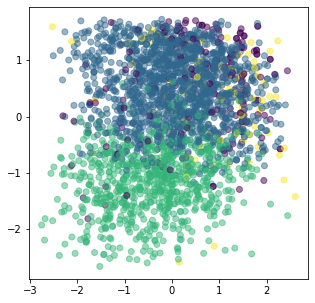

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 3], X_prep[:, 4], c=clusters,alpha=0.5)
plt.show()

In [16]:
kmeans.inertia_ 

19394.063231243883

In [17]:
%%time
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=75,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

19397.077474146554
Wall time: 230 ms


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

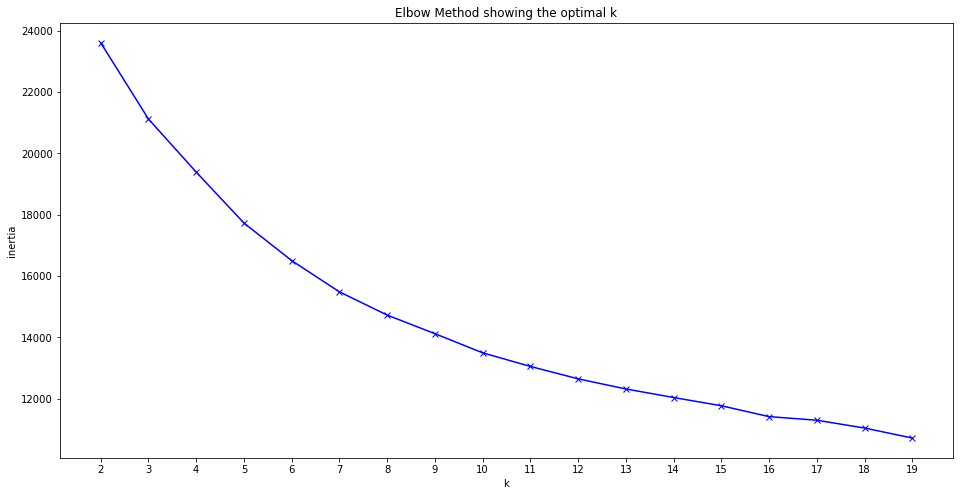

In [18]:
# lets find the best amount of clusters for the dataset

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

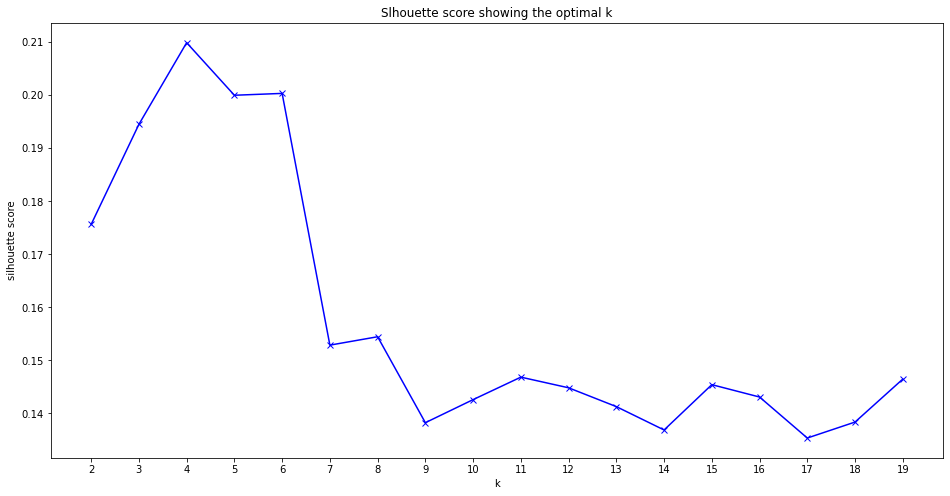

In [19]:
# there seem to be no clear elbow in my inertia score, lets see if the siloutte score gives some more info. 

from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

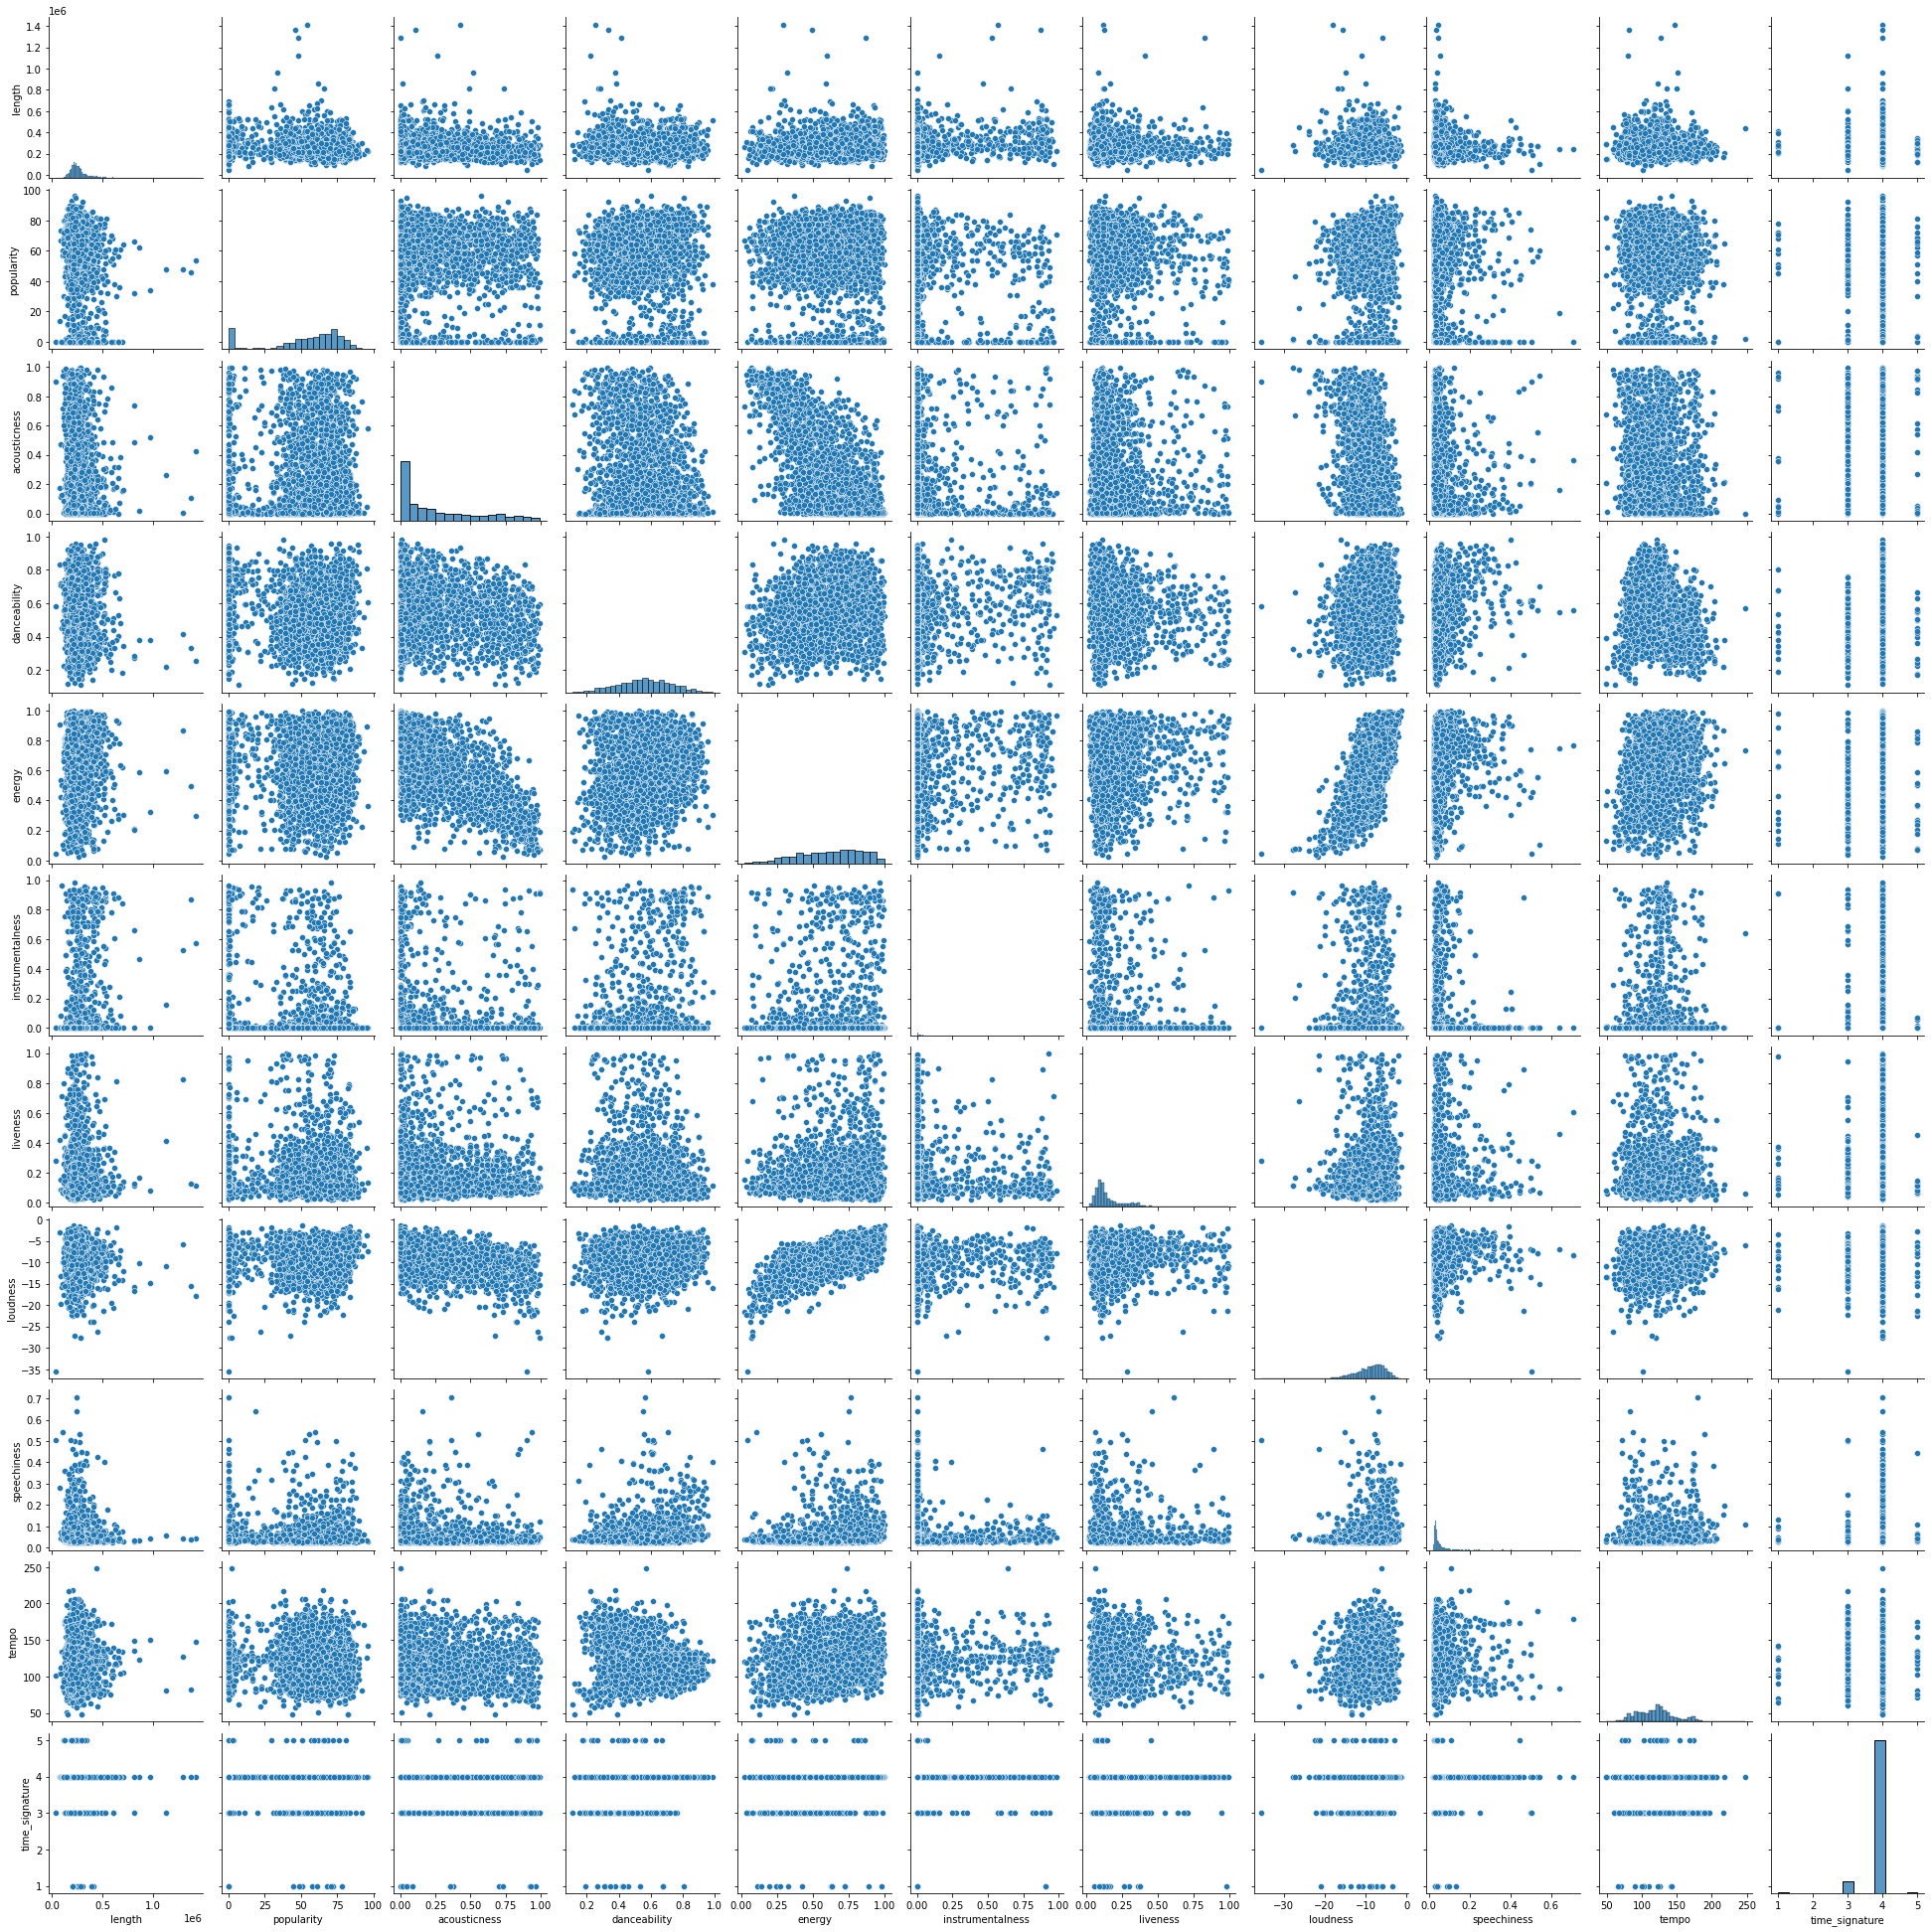

In [20]:
# it looks like im going to choose for 4 clusers.

# now i want to find the plot with the best amount of clusters

import seaborn as sb
# pairplot with hue day
sb.pairplot(spot_num)
# to show
plt.show()

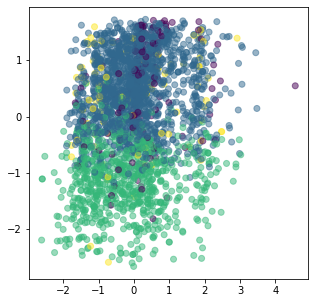

In [21]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=4,linkage='ward')
pred = agglomerative.fit_predict(spot_num)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 9], X_prep[:, 4], c=clusters,alpha=0.5)
plt.show()

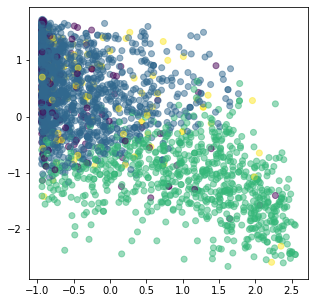

In [22]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=4,linkage='ward')
pred = agglomerative.fit_predict(spot_num)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 2], X_prep[:, 4], c=clusters,alpha=0.5)
plt.show()

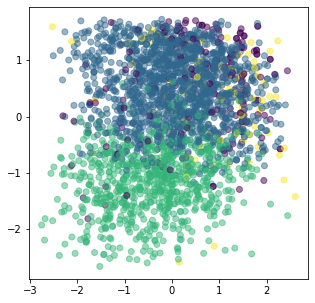

In [23]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=4,linkage='ward')
pred = agglomerative.fit_predict(spot_num)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 3], X_prep[:, 4], c=clusters,alpha=0.5)
plt.show()

In [ ]:
# the plot of column 3 and 4 looks the best to me. so we will use that combination.

In [34]:
import joblib

joblib.dump(kmeans_fitted,'spot_model',compress=True)

['spot_model']

In [ ]:
# i exported the file and will make the reccomender in another jupyther file.

In [ ]:
spot.to_csv (r'spot_cluster.csv', index = False, header=True)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_prep)

In [30]:
import joblib

joblib.dump(transformer,'scaler',compress=True)

['scaler']

In [ ]:
pca.explained_variance_ratio_.round(2)

In [ ]:
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# above dont seem to be significant for my data.